In [ ]:
medical_chrages_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
from urllib.request import urlretrieve
urlretrieve(medical_chrages_url, "medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x7d330b64d290>)

In [ ]:
import pandas as pd
medical_df = pd.read_csv("medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Analysis and Visualization

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
medical_df.age.describe() # might want to histogram

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


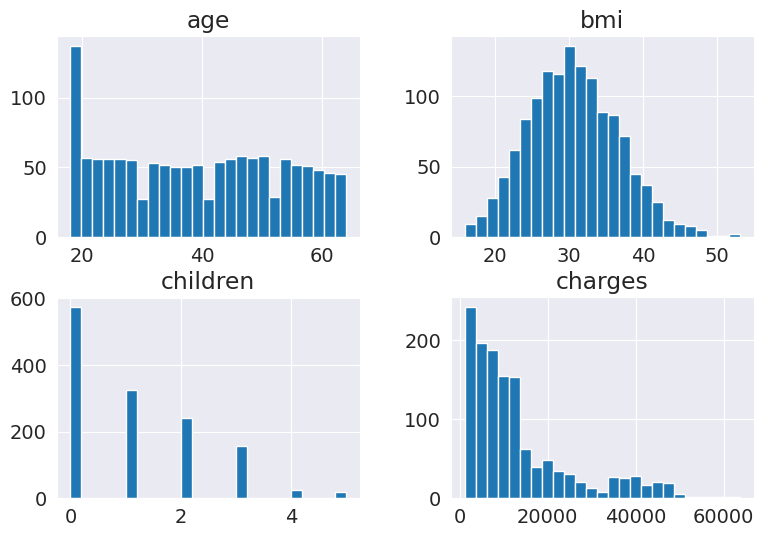

In [ ]:
import matplotlib.pyplot as plt
medical_df.hist(bins=25, figsize=(9,6))
plt.show()

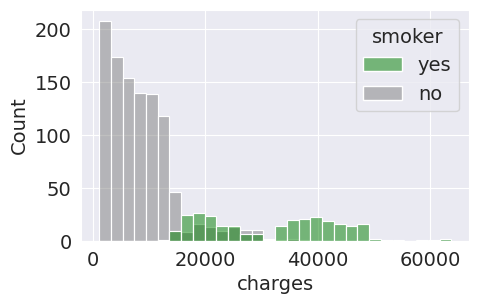

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=medical_df, x="charges", hue="smoker",
             palette={"yes": "green", "no": "grey"})
plt.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


TypeError: 'str' object is not callable

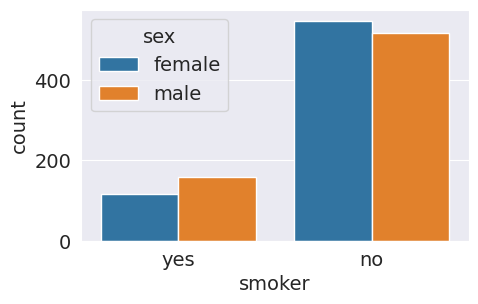

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.countplot(data=medical_df, x="smoker", hue="sex")
plt.title("Smoker")
plt.xlabel("smoker")
plt.ylabel("Count")
plt.show()

In [ ]:
medical_df.corr(numeric_only=True).charges

In [ ]:
plt.figure(figsize=(7.5, 4.5))
sns.scatterplot(data=medical_df,
                x='age',
                y='charges',
                hue='smoker',
                alpha=0.8,
                size=5)
plt.title('Age vs. Charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

In [ ]:
plt.figure(figsize=(6,4.5))
sns.scatterplot(medical_df,
                x="bmi",
                y="charges",
                hue="smoker",
                size=10)
plt.title("BMI vs. Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

# Correlation

In [ ]:
correlation_matrix = medical_df.corr(numeric_only=True)
correlation_matrix

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Medical Data')
plt.show()

# Implementation of Linear Regression using a Single Feature

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == "no"]

plt.figure(figsize=(8,6))
sns.scatterplot(medical_df,
                x="age",
                y="charges")

plt.title("Age vs. Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()